In [1307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns
%matplotlib inline


In [1308]:
prod = pd.read_csv('product.csv')
trans = pd.read_csv('transaction_data.csv')
dem = pd.read_csv('demographic.csv')
trans_short=pd.read_csv('mix_values.csv',usecols=range(1,14))

In [1278]:
income={'35-49K':35000, '50-74K':50000, '25-34K':25000, '75-99K':75000, 'Under 15K':1, '100-124K':100000,
       '15-24K':15000, '125-149K':125000, '150-174K':150000, '250K+':250000, '175-199K':175000, '200-249K':200000}
maxincome={'35-49K':49000, '50-74K':74000, '25-34K':34000, '75-99K':99000, 'Under 15K':15000, '100-124K':124000,
       '15-24K':24000, '125-149K':149000, '150-174K':174000, '250K+':275000, '175-199K':199000, '200-249K':249000}

In [581]:
dem['AGE'].unique()

array([65, 45, 25, 35, 19, 55])

In [511]:
dem['MIN_INCOME']=dem['INCOME_DESC'].map(income)
dem['MAX_INCOME']=dem['INCOME_DESC'].map(maxincome)

In [1261]:
trans_short['DEPARTMENT'].unique()

array(['PRODUCE', 'GROCERY', 'DRUG GM', 'MEAT', 'MEAT-PCKGD', 'DELI',
       'SEAFOOD-PCKGD', ' ', 'PASTRY', 'NUTRITION', 'VIDEO RENTAL',
       'MISC SALES TRAN', 'FLORAL', 'SEAFOOD', 'SALAD BAR', 'AUTOMOTIVE',
       'SPIRITS', 'COSMETICS', 'MISC. TRANS.', 'GARDEN CENTER',
       'CHEF SHOPPE', 'TRAVEL & LEISUR', 'COUP/STR & MFG', 'KIOSK-GAS',
       'FROZEN GROCERY', 'RESTAURANT', 'HOUSEWARES', 'PORK',
       'POSTAL CENTER', 'GM MERCH EXP', 'CNTRL/STORE SUP',
       'PROD-WHS SALES', 'DAIRY DELI', 'HBC', 'CHARITABLE CONT', 'RX',
       'TOYS', 'PHOTO', 'DELI/SNACK BAR', 'GRO BAKERY', 'PHARMACY SUPPLY',
       'ELECT &PLUMBING', 'MEAT-WHSE', 'VIDEO'], dtype=object)

In [1262]:
trans_short[trans_short['DEPARTMENT']=='MISC SALES TRAN']

,household_key,DAY,WEEK_NO,PRODUCT_ID,STORE_ID,SALES_VALUE,PAID_BY_CUSTOMER,DEPARTMENT,AGE,HH_COMP_NUMBER,RETAIL_DISC,MIN_INCOME,QUANTITY
335,1617,3,1,882305,440,1.00,1.00,MISC SALES TRAN,0,0,0.00,"50,000.00",1
2305,175,7,2,1042697,446,2.99,2.99,MISC SALES TRAN,0,0,0.00,0.00,1
3784,718,10,2,1049788,324,3.45,3.45,MISC SALES TRAN,45,3,0.00,0.00,1
5578,1852,13,3,1042697,367,6.99,6.99,MISC SALES TRAN,0,0,0.00,0.00,1
5682,1617,13,3,1042697,340,1.16,1.16,MISC SALES TRAN,0,0,0.00,0.00,1
7591,437,16,3,1049788,361,7.46,7.46,MISC SALES TRAN,25,3,0.00,0.00,1
7675,2044,16,3,1021164,356,25.00,25.00,MISC SALES TRAN,0,0,0.00,0.00,1
7687,1163,16,3,882305,363,1.00,1.00,MISC SALES TRAN,35,0,0.00,0.00,1
7902,2448,17,3,882305,362,3.50,3.50,MISC SALES TRAN,45,-2,0.00,0.00,1
8751,655,18,3,1042697,334,0.25,0.25,MISC SALES TRAN,0,0,0.00,0.00,1


In [1251]:
trans_short['MIN_INCOME']=dem['INCOME_DESC'].map(income)

In [1252]:
trans_short['MIN_INCOME']=trans_short['MIN_INCOME'].fillna(0)

In [324]:
trans_storeid= trans_short[trans_short['WEEK_NO']==50].groupby(['STORE_ID']).nunique().drop('STORE_ID',axis=1)

In [325]:
trans_storeid[trans_storeid['PRODUCT_ID']==736]

,household_key,DAY,WEEK_NO,PRODUCT_ID,SALES_VALUE,PAID_BY_CUSTOMER,DEPARTMENT,AGE,HH_COMP_NUMBER,RETAIL_DISC,MIN_INCOME,QUANTITY
STORE_ID,,,,,,,,,,,,
367,49,7,1,736,247,265,18,7,6,119,9,20


In [286]:
trans_store_week.head()

household_key  DAY  WEEK_NO  PRODUCT_ID  STORE_ID  \
STORE_ID WEEK_NO                                                      
1        5                    1    1        1           2         1   
         6                    1    1        1           1         1   
         14                   1    1        1           1         1   
2        41                   1    1        1           1         1   
         93                   1    1        1           1         1   

                  SALES_VALUE  PAID_BY_CUSTOMER  DEPARTMENT  AGE  \
STORE_ID WEEK_NO                                                   
1        5                  2                 2           2    1   
         6                  1                 1           1    1   
         14                 1                 1           1    1   
2        41                 1                 1           1    1   
         93                 1                 1           1    1   

                  HH_COMP_NUMBER  RETAIL_DISC  MIN_INCOME  QUANTITY  
STORE_ID WEEK_NO                                                     
1        5                     1            2           1         2  
         6                     1            1           1         1  
         14                    1            1           1         1  
2        41                    1            1           1         1  
         93                    1            1           1         1

In [ ]:
trans_store_week[trans_store_week['WEEK_NO']==50].head()

In [206]:
trans_day=trans_short.groupby(['household_key','DAY']).mean().reset_index()
trans_day.head(10)

,household_key,DAY,WEEK_NO,PRODUCT_ID,STORE_ID,SALES_VALUE,PAID_BY_CUSTOMER,AGE,HH_COMP_NUMBER,RETAIL_DISC,MIN_INCOME,QUANTITY
0,1,51,8.00,"2,353,647.80",436.00,2.62,3.17,6.00,4.00,-0.55,"35,000.00",1.13
1,1,67,10.00,"3,981,802.50",436.00,3.43,4.14,6.00,4.00,-0.72,"35,000.00",1.17
2,1,88,13.00,"2,419,025.42",436.00,2.24,2.80,6.00,4.00,-0.56,"35,000.00",1.08
3,1,94,14.00,"2,243,932.13",436.00,2.76,3.26,6.00,4.00,-0.48,"35,000.00",1.39
4,1,101,15.00,"3,705,051.06",436.00,3.14,4.11,6.00,4.00,-0.97,"35,000.00",1.18
5,1,108,16.00,"2,403,379.00",436.00,2.68,3.40,6.00,4.00,-0.72,"35,000.00",1.10
6,1,111,17.00,"3,275,472.44","31,401.00",2.62,3.06,6.00,4.00,-0.44,"35,000.00",1.33
7,1,128,19.00,"2,720,180.05",436.00,2.83,3.10,6.00,4.00,-0.22,"35,000.00",1.10
8,1,137,20.00,"2,518,400.78",436.00,2.43,2.93,6.00,4.00,-0.50,"35,000.00",1.19
9,1,146,22.00,"1,962,490.66",436.00,2.53,3.00,6.00,4.00,-0.47,"35,000.00",1.10


In [271]:
trans_short.set_index(['STORE_ID','WEEK_NO','PRODUCT_ID'],inplace=False)
trans_week=trans_short.groupby(['STORE_ID','WEEK_NO','PRODUCT_ID']).sum().reset_index()
trans_week.head(10)

,STORE_ID,WEEK_NO,PRODUCT_ID,household_key,DAY,SALES_VALUE,PAID_BY_CUSTOMER,AGE,HH_COMP_NUMBER,RETAIL_DISC,MIN_INCOME,QUANTITY
0,1,5,480014,2009,29,15.00,15.72,0,0,-0.72,0,7249
1,1,5,718226,2009,29,7.40,7.40,0,0,0.00,0,1
2,1,6,480014,2009,34,5.00,5.24,0,0,-0.24,0,2438
3,1,14,6903760,1172,96,2.49,2.49,2,2,0.00,50000,1
4,2,41,702733,2449,281,4.29,4.29,3,5,0.00,175000,1
5,2,93,721164,2449,644,13.99,13.99,3,5,0.00,175000,1
6,12,55,734370,2245,382,1.00,1.59,0,0,-0.59,0,1
7,12,55,812052,2245,382,4.99,6.99,0,0,-2.00,0,1
8,12,55,5547796,2245,382,1.58,1.58,0,0,0.00,0,2
9,12,55,6513480,2245,382,4.49,4.59,0,0,-0.10,0,1


In [272]:
trans_week[trans_week['WEEK_NO']==50].head()

,STORE_ID,WEEK_NO,PRODUCT_ID,household_key,DAY,SALES_VALUE,PAID_BY_CUSTOMER,AGE,HH_COMP_NUMBER,RETAIL_DISC,MIN_INCOME,QUANTITY
1472,136,50,594426,2120,344,2.49,2.49,0,0,0.00,0,1
2497,189,50,439933,2120,343,4.29,4.29,0,0,0.00,0,1
2498,189,50,442456,2120,343,5.00,6.98,0,0,-1.98,0,2
2499,189,50,445172,2120,343,42.76,42.76,0,0,0.00,0,3
2500,189,50,480433,2120,343,5.99,9.99,0,0,-4.00,0,1


In [267]:
trans_50=trans_week[trans_week['WEEK_NO']==50]
trans_50.head()

,STORE_ID,WEEK_NO,PRODUCT_ID,household_key,DAY,SALES_VALUE,PAID_BY_CUSTOMER,AGE,HH_COMP_NUMBER,RETAIL_DISC,MIN_INCOME,QUANTITY
1472,136,50,594426,2120,344,2.49,2.49,0,0,0.00,0,1
2497,189,50,439933,2120,343,4.29,4.29,0,0,0.00,0,1
2498,189,50,442456,2120,343,5.00,6.98,0,0,-1.98,0,2
2499,189,50,445172,2120,343,42.76,42.76,0,0,0.00,0,3
2500,189,50,480433,2120,343,5.99,9.99,0,0,-4.00,0,1


In [268]:
trans_50[trans_50['SALES_VALUE']==trans_50['SALES_VALUE'].max()]

,STORE_ID,WEEK_NO,PRODUCT_ID,household_key,DAY,SALES_VALUE,PAID_BY_CUSTOMER,AGE,HH_COMP_NUMBER,RETAIL_DISC,MIN_INCOME,QUANTITY
1521762,406,50,6534178,14628,4481,386.63,400.04,45,41,-13.41,740002,174577


In [270]:
trans_short.set_index('STORE_ID',inplace=False)
trans_50.groupby('STORE_ID').sum()

,WEEK_NO,PRODUCT_ID,household_key,DAY,SALES_VALUE,PAID_BY_CUSTOMER,AGE,HH_COMP_NUMBER,RETAIL_DISC,MIN_INCOME,QUANTITY
STORE_ID,,,,,,,,,,,
136,50,594426,2120,344,2.49,2.49,0,0,0.00,0,1
189,1500,99267987,63600,10290,279.08,348.30,0,0,-69.22,0,84
244,150,7977001,225,1032,11.07,13.07,0,0,-2.00,0,5
286,5800,244600725,127682,41493,313.54,381.35,348,273,-67.81,5070018,154
288,6800,434524649,165786,49344,443.34,540.35,215,177,-97.01,1300011,162
289,15000,644080017,344752,108569,785.82,935.43,85,132,-148.46,915000,404
292,22600,1171329293,946907,183283,"1,517.31","1,826.35",639,693,-307.59,9365012,741
293,9900,642494237,245886,70264,559.80,681.36,277,339,-121.11,2670050,278
295,13900,621399833,390658,107957,930.11,"1,167.37",390,208,-237.27,3150009,438


In [1309]:
hh_code={1:1, -1:2, 2:3, -2:4, 3:5, 0:0}
age_code={65:6,45:4, 25:2, 35:3, 19:1, 55:5, 0:0}

In [1310]:
trans_short['HH_COMP_NUMBER']=trans_short['HH_COMP_NUMBER'].map(hh_code)
trans_short['AGE']=trans_short['AGE'].map(age_code)

In [1311]:
trans_short.set_index(['household_key'],inplace=False)
trans_hh=trans_short.groupby(['household_key','DEPARTMENT']).mean().reset_index()
trans_hh_pivot=trans_hh.pivot_table(index='household_key',values='PAID_BY_CUSTOMER',columns='DEPARTMENT')
trans_hh_pivot=trans_hh_pivot.join(trans_hh['HH_COMP_NUMBER'])

trans_short.set_index(['household_key'],inplace=False)
trans_age=trans_short.groupby(['household_key','DEPARTMENT']).mean().reset_index()
trans_age_pivot=trans_age.pivot_table(index='household_key',values='PAID_BY_CUSTOMER',columns='DEPARTMENT')
trans_age_pivot=trans_age_pivot.join(trans_age['AGE'])

In [1312]:
trans_hh_pivot.drop(' ',axis=1,inplace=True)
trans_age_pivot.drop(' ',axis=1,inplace=True)

In [1313]:
trans_hh_pivot.fillna(value=-1,inplace=True)
trans_age_pivot.fillna(value=-1,inplace=True)

In [1323]:
trans_age_pivot.columns

Index(['AUTOMOTIVE', 'CHARITABLE CONT', 'CHEF SHOPPE', 'CNTRL/STORE SUP',
       'COSMETICS', 'COUP/STR & MFG', 'DAIRY DELI', 'DELI', 'DELI/SNACK BAR',
       'DRUG GM', 'ELECT &PLUMBING', 'FLORAL', 'FROZEN GROCERY',
       'GARDEN CENTER', 'GM MERCH EXP', 'GRO BAKERY', 'GROCERY', 'HBC',
       'HOUSEWARES', 'KIOSK-GAS', 'MEAT', 'MEAT-PCKGD', 'MEAT-WHSE',
       'MISC SALES TRAN', 'MISC. TRANS.', 'NUTRITION', 'PASTRY',
       'PHARMACY SUPPLY', 'PHOTO', 'PORK', 'POSTAL CENTER', 'PROD-WHS SALES',
       'PRODUCE', 'RESTAURANT', 'RX', 'SALAD BAR', 'SEAFOOD', 'SEAFOOD-PCKGD',
       'SPIRITS', 'TOYS', 'TRAVEL & LEISUR', 'VIDEO', 'VIDEO RENTAL', 'AGE'],
      dtype='object')

In [1343]:
for i in trans_age_pivot.columns[:-1]: print(i)

AUTOMOTIVE
CHARITABLE CONT
CHEF SHOPPE
CNTRL/STORE SUP
COSMETICS
COUP/STR & MFG
DAIRY DELI
DELI
DELI/SNACK BAR
DRUG GM
ELECT &PLUMBING
FLORAL
FROZEN GROCERY
GARDEN CENTER
GM MERCH EXP
GRO BAKERY
GROCERY
HBC
HOUSEWARES
KIOSK-GAS
MEAT
MEAT-PCKGD
MEAT-WHSE
MISC SALES TRAN
MISC. TRANS.
NUTRITION
PASTRY
PHARMACY SUPPLY
PHOTO
PORK
POSTAL CENTER
PROD-WHS SALES
PRODUCE
RESTAURANT
RX
SALAD BAR
SEAFOOD
SEAFOOD-PCKGD
SPIRITS
TOYS
TRAVEL & LEISUR
VIDEO
VIDEO RENTAL


In [1340]:

for i in trans_age_pivot.columns[:-1]:
    scaler=StandardScaler()
    scaler.fit(trans_age_pivot[i].values,y=None)
    trans_age_pivot[i]=scaler.transform(trans_age_pivot[i].values,y=None)

ValueError: Expected 2D array, got 1D array instead:
array=[-1. -1. -1. ..., -1. -1. -1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [1314]:
trans_age_pivot['AGE'].unique()

array([ 6.,  0.,  4.,  2.,  3.,  1.,  5.])

In [1320]:
trans_age_pivot.head(10)

,AUTOMOTIVE,CHARITABLE CONT,CHEF SHOPPE,CNTRL/STORE SUP,COSMETICS,COUP/STR & MFG,DAIRY DELI,DELI,DELI/SNACK BAR,DRUG GM,ELECT &PLUMBING,FLORAL,FROZEN GROCERY,GARDEN CENTER,GM MERCH EXP,GRO BAKERY,GROCERY,HBC,HOUSEWARES,KIOSK-GAS,MEAT,MEAT-PCKGD,MEAT-WHSE,MISC SALES TRAN,MISC. TRANS.,NUTRITION,PASTRY,PHARMACY SUPPLY,PHOTO,PORK,POSTAL CENTER,PROD-WHS SALES,PRODUCE,RESTAURANT,RX,SALAD BAR,SEAFOOD,SEAFOOD-PCKGD,SPIRITS,TOYS,TRAVEL & LEISUR,VIDEO,VIDEO RENTAL,AGE
household_key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,3.29,-1.00,3.33,-1.00,7.99,-1.00,-1.00,-1.00,-1.00,2.90,-1.00,-1.00,-1.00,5.79,3.51,-1.00,10.00,-1.00,2.64,3.11,-1.00,-1.00,-1.00,-1.00,-1.00,1.96,1.39,-1.00,4.47,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,6.00
2,-1.00,-1.00,-1.00,-1.00,5.58,-1.00,-1.00,3.69,-1.00,3.55,-1.00,21.99,-1.00,-1.00,-1.00,-1.00,2.86,-1.00,-1.00,-1.00,7.99,4.17,-1.00,4.26,-1.00,2.49,2.48,-1.00,-1.00,-1.00,-1.00,-1.00,2.46,-1.00,-1.00,-1.00,-1.00,8.99,-1.00,-1.00,-1.00,-1.00,-1.00,6.00
3,-1.00,-1.00,-1.00,-1.00,1.25,-1.00,-1.00,7.46,-1.00,2.25,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,3.28,-1.00,-1.00,20.70,12.04,4.58,-1.00,-1.00,-1.00,-1.00,3.29,-1.00,-1.00,-1.00,-1.00,-1.00,2.29,-1.00,-1.00,1.36,-1.00,5.99,-1.00,-1.00,-1.00,-1.00,-1.00,6.00
4,-1.00,-1.00,-1.00,-1.00,1.49,-1.00,-1.00,7.18,-1.00,11.07,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,3.47,-1.00,-1.00,-1.00,4.30,4.97,-1.00,-1.00,-1.00,3.29,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1.62,-1.00,-1.00,-1.00,-1.00,4.76,-1.00,-1.00,-1.00,-1.00,-1.00,6.00
5,-1.00,-1.00,-1.00,-1.00,4.74,-1.00,-1.00,4.14,-1.00,4.35,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,3.27,-1.00,-1.00,-1.00,8.52,6.76,-1.00,-1.00,-1.00,1.59,2.38,-1.00,-1.00,-1.00,-1.00,-1.00,1.09,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,6.00
6,-1.00,-1.00,2.99,-1.00,3.95,-1.00,-1.00,5.90,-1.00,3.82,-1.00,11.99,-1.00,4.29,-1.00,-1.00,3.30,-1.00,-1.00,32.49,6.69,3.69,-1.00,9.00,-1.00,3.17,4.53,-1.00,-1.00,-1.00,-1.00,-1.00,2.74,-1.00,-1.00,3.04,7.20,10.99,-1.00,-1.00,-1.00,-1.00,-1.00,6.00
7,-1.00,-1.00,-1.00,-1.00,7.07,-1.00,-1.00,5.15,-1.00,3.42,-1.00,4.99,-1.00,-1.00,-1.00,-1.00,2.70,-1.00,-1.00,-1.00,5.91,3.66,-1.00,-1.00,1.75,3.05,3.13,-1.00,-1.00,-1.00,-1.00,-1.00,2.53,-1.00,-1.00,-1.00,6.59,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,6.00
8,-1.00,-1.00,2.50,-1.00,5.71,-1.00,1.00,4.20,-1.00,4.62,-1.00,12.08,-1.00,6.67,-1.00,-1.00,2.79,-1.00,-1.00,24.44,7.18,4.94,-1.00,1.58,-1.00,5.99,3.31,-1.00,-1.00,-1.00,-1.00,-1.00,2.40,-1.00,-1.00,2.99,2.49,6.35,9.99,-1.00,-1.00,-1.00,-1.00,6.00
9,-1.00,-1.00,2.99,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,3.38,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,4.27,-1.00,-1.00,-1.00,9.43,7.41,-1.00,-1.00,-1.00,1.29,4.99,-1.00,-1.00,-1.00,-1.00,-1.00,1.93,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,6.00


In [1386]:
# load dataset
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X = trans_hh_pivot[trans_hh_pivot['HH_COMP_NUMBER']!=0][['AUTOMOTIVE', 'CHARITABLE CONT', 'CHEF SHOPPE', 'CNTRL/STORE SUP',
       'COSMETICS', 'COUP/STR & MFG', 'DAIRY DELI', 'DELI', 'DELI/SNACK BAR',
       'DRUG GM', 'ELECT &PLUMBING', 'FLORAL', 'FROZEN GROCERY',
       'GARDEN CENTER', 'GM MERCH EXP', 'GRO BAKERY', 'GROCERY', 'HBC',
       'HOUSEWARES', 'KIOSK-GAS', 'MEAT', 'MEAT-PCKGD', 'MEAT-WHSE',
       'MISC SALES TRAN', 'MISC. TRANS.', 'NUTRITION', 'PASTRY',
       'PHARMACY SUPPLY', 'PHOTO', 'PORK', 'POSTAL CENTER', 'PROD-WHS SALES',
       'PRODUCE', 'RESTAURANT', 'RX', 'SALAD BAR', 'SEAFOOD', 'SEAFOOD-PCKGD',
       'SPIRITS', 'TOYS', 'TRAVEL & LEISUR', 'VIDEO', 'VIDEO RENTAL']].as_matrix()

Xa = trans_age_pivot[trans_age_pivot['AGE']!=0][['AUTOMOTIVE', 'CHARITABLE CONT', 'CHEF SHOPPE', 'CNTRL/STORE SUP',
       'COSMETICS', 'COUP/STR & MFG', 'DAIRY DELI', 'DELI', 'DELI/SNACK BAR',
       'DRUG GM', 'ELECT &PLUMBING', 'FLORAL', 'FROZEN GROCERY',
       'GARDEN CENTER', 'GM MERCH EXP', 'GRO BAKERY', 'GROCERY', 'HBC',
       'HOUSEWARES', 'KIOSK-GAS', 'MEAT', 'MEAT-PCKGD', 'MEAT-WHSE',
       'MISC SALES TRAN', 'MISC. TRANS.', 'NUTRITION', 'PASTRY',
       'PHARMACY SUPPLY', 'PHOTO', 'PORK', 'POSTAL CENTER', 'PROD-WHS SALES',
       'PRODUCE', 'RESTAURANT', 'RX', 'SALAD BAR', 'SEAFOOD', 'SEAFOOD-PCKGD',
       'SPIRITS', 'TOYS', 'TRAVEL & LEISUR', 'VIDEO', 'VIDEO RENTAL']].as_matrix()

X_topred = trans_hh_pivot[trans_hh_pivot['HH_COMP_NUMBER']==0][['AUTOMOTIVE',  'CHARITABLE CONT', 'CHEF SHOPPE', 'CNTRL/STORE SUP',
       'COSMETICS', 'COUP/STR & MFG', 'DAIRY DELI', 'DELI', 'DELI/SNACK BAR',
       'DRUG GM', 'FLORAL', 'FROZEN GROCERY',
       'GARDEN CENTER', 'GROCERY', 'KIOSK-GAS', 'MEAT', 'MEAT-PCKGD', 
       'MISC SALES TRAN', 'MISC. TRANS.', 'NUTRITION', 'PASTRY',
        'PHOTO', 'PRODUCE', 'RESTAURANT', 'SALAD BAR', 'SEAFOOD', 'SEAFOOD-PCKGD',
       'SPIRITS', 'TRAVEL & LEISUR']].as_matrix()

Xa_topred = trans_age_pivot[trans_age_pivot['AGE']==0][['AUTOMOTIVE',  'CHARITABLE CONT', 'CHEF SHOPPE', 'CNTRL/STORE SUP',
       'COSMETICS', 'COUP/STR & MFG', 'DAIRY DELI', 'DELI', 'DELI/SNACK BAR',
       'DRUG GM', 'FLORAL', 'FROZEN GROCERY',
       'GARDEN CENTER', 'GROCERY', 'KIOSK-GAS', 'MEAT', 'MEAT-PCKGD', 
       'MISC SALES TRAN', 'MISC. TRANS.', 'NUTRITION', 'PASTRY',
        'PHOTO', 'PRODUCE', 'RESTAURANT', 'SALAD BAR', 'SEAFOOD', 'SEAFOOD-PCKGD',
       'SPIRITS', 'TRAVEL & LEISUR']].as_matrix()

y_bef = trans_hh_pivot[trans_hh_pivot['HH_COMP_NUMBER']!=0]['HH_COMP_NUMBER'].as_matrix()-1
y =keras.utils.to_categorical(y_bef,num_classes=5)

ya_bef = trans_age_pivot[trans_age_pivot['AGE']!=0]['AGE'].as_matrix()-1
ya =keras.utils.to_categorical(ya_bef,num_classes=6)

X_trainbef, X_testbef, y_trainbef, y_testbef = train_test_split(X, y_bef, test_size = 0.1, random_state = 0)
Xa_trainbef, Xa_testbef, ya_trainbef, ya_testbef = train_test_split(Xa, ya_bef, test_size = 0.1, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 31)
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size = 0.2, random_state = 31)


In [1145]:
features=len(['AUTOMOTIVE', 'CHARITABLE CONT', 'CHEF SHOPPE', 'CNTRL/STORE SUP',
       'COSMETICS', 'COUP/STR & MFG', 'DAIRY DELI', 'DELI', 'DELI/SNACK BAR',
       'DRUG GM', 'ELECT &PLUMBING', 'FLORAL', 'FROZEN GROCERY',
       'GARDEN CENTER', 'GM MERCH EXP', 'GRO BAKERY', 'GROCERY', 'HBC',
       'HOUSEWARES', 'KIOSK-GAS', 'MEAT', 'MEAT-PCKGD', 'MEAT-WHSE',
       'MISC SALES TRAN', 'MISC. TRANS.', 'NUTRITION', 'PASTRY',
       'PHARMACY SUPPLY', 'PHOTO', 'PORK', 'POSTAL CENTER', 'PROD-WHS SALES',
       'PRODUCE', 'RESTAURANT', 'RX', 'SALAD BAR', 'SEAFOOD', 'SEAFOOD-PCKGD',
       'SPIRITS', 'TOYS', 'TRAVEL & LEISUR', 'VIDEO', 'VIDEO RENTAL'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef72b37fd0>]], dtype=object)

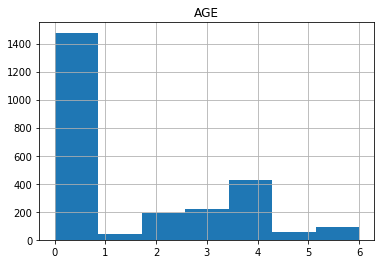

In [1104]:
trans_age_pivot.hist(column='AGE',bins=7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fefb93eb6d8>]], dtype=object)

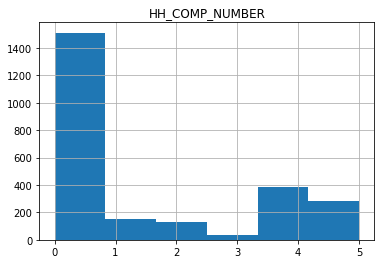

In [16]:
trans_hh_pivot.hist(column='HH_COMP_NUMBER',bins=6)

In [1319]:
y_test.shape

(198, 5)

In [1373]:
len(y_testbef==3)

99

[[ 0  0  0 10  4]
 [ 0  0  0  7  3]
 [ 0  0  0  1  0]
 [ 2  0  0 26  7]
 [ 1  0  0 27 11]]
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        14
        1.0       0.00      0.00      0.00        10
        2.0       0.00      0.00      0.00         1
        3.0       0.37      0.74      0.49        35
        4.0       0.44      0.28      0.34        39

avg / total       0.30      0.37      0.31        99



[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished


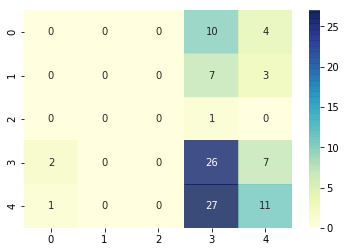

In [1381]:

# training a DescisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtree_model = RandomForestClassifier(n_estimators=40, criterion='entropy',verbose=True).fit(X_trainbef, y_trainbef)
dtree_predictions = dtree_model.predict(X_testbef)
# creating a confusion matrix
cm = confusion_matrix(y_testbef, dtree_predictions)
print(cm)
print(classification_report(y_testbef,dtree_predictions))
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)

In [1360]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
 
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1,degree=10, decision_function_shape='ovo').fit(X_trainbef, y_trainbef)
svm_predictions = svm_model_linear.predict(X_testbef)
print(classification_report(y,svm_predictions))
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_testbef, y_testbef)
print(accuracy)
# creating a confusion matrix
cm = confusion_matrix(y_testbef, svm_predictions)
print(cm)

ValueError: Mix type of y not allowed, got types {'binary', 'multilabel-indicator'}

[[  0   0  43   0   0   0]
 [  0   0  17   0   0   0]
 [  0   0 150   0   0   0]
 [  0   0  14   0   0   0]
 [  0   0   3   0   0   0]
 [  0   0  23   0   0   0]]


0.349514563107
[[ 0  0  0  7  0  0]
 [ 0  3  1 19  0  0]
 [ 0  1  2 21  0  0]
 [ 0  1  3 31  0  0]
 [ 0  0  0  3  0  0]
 [ 0  1  1  9  0  0]]
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         7
        1.0       0.50      0.13      0.21        23
        2.0       0.29      0.08      0.13        24
        3.0       0.34      0.89      0.50        35
        4.0       0.00      0.00      0.00         3
        5.0       0.00      0.00      0.00        11

avg / total       0.30      0.35      0.24       103



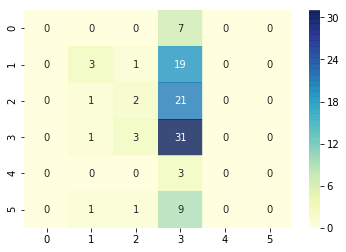

In [1392]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 30).fit(Xa_trainbef, ya_trainbef)
 
# accuracy on X_test
accuracy = knn.score(Xa_testbef, ya_testbef)
print(accuracy)
 
# creating a confusion matrix
knn_predictions = knn.predict(Xa_testbef) 
cm = confusion_matrix(ya_testbef, knn_predictions)
print(cm)
print(classification_report(ya_testbef,knn_predictions))
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)

In [1114]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_bef)
encoded_Y = encoder.transform(y_bef)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [1115]:

# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(40, input_dim=len(X[0]), activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [1116]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=128, verbose=0)

In [1117]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 30.06% (3.59%)


In [1120]:
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

from __future__ import print_function
from datetime import datetime
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [1121]:

def plot_decision_boundary(func, X, y, figsize=(9, 6)):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = func(ab)
    cc = c.reshape(aa.shape)

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    fig, ax = plt.subplots(figsize=figsize)
    contour = plt.contourf(aa, bb, cc, cmap=cm, alpha=0.8)
    
    ax_c = fig.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.xlim(amin, amax)
    plt.ylim(bmin, bmax)

def plot_multiclass_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
    cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    Z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()], verbose=0)
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
def plot_data(X, y, figsize=None):
    if not figsize:
        figsize = (8, 6)
    plt.figure(figsize=figsize)
    plt.plot(X[y==0, 0], X[y==0, 1], 'or', alpha=0.5, label=0)
    plt.plot(X[y==1, 0], X[y==1, 1], 'ob', alpha=0.5, label=1)
    plt.xlim((min(X[:, 0])-0.1, max(X[:, 0])+0.1))
    plt.ylim((min(X[:, 1])-0.1, max(X[:, 1])+0.1))
    plt.legend()

def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['acc'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

def plot_loss(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])
    
def plot_confusion_matrix(model, X, y):
    y_pred = model.predict_classes(X, verbose=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)

def plot_compare_histories(history_list, name_list, plot_accuracy=True):
    dflist = []
    for history in history_list:
        h = {key: val for key, val in history.history.items() if not key.startswith('val_')}
        dflist.append(pd.DataFrame(h, index=history.epoch))

    historydf = pd.concat(dflist, axis=1)

    metrics = dflist[0].columns
    idx = pd.MultiIndex.from_product([name_list, metrics], names=['model', 'metric'])
    historydf.columns = idx
    
    plt.figure(figsize=(6, 8))

    ax = plt.subplot(211)
    historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
    plt.title("Loss")
    
    if plot_accuracy:
        ax = plt.subplot(212)
        historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
        plt.title("Accuracy")
        plt.xlabel("Epochs")

    plt.tight_layout()

def make_multiclass(N=500, D=2, K=3):
    """
    N: number of points per class
    D: dimensionality
    K: number of classes
    """
    np.random.seed(0)
    X = np.zeros((N*K, D))
    y = np.zeros(N*K)
    for j in range(K):
        ix = range(N*j, N*(j+1))
        # radius
        r = np.linspace(0.0,1,N)
        # theta
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    fig = plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    return X, y

In [1141]:
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(12, activation='relu', input_dim=29))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.02, decay=1e-6, momentum=0.5, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=200,batch_size=128,verbose=0)
score = model.evaluate(X_test, y_test, batch_size=128,verbose=0)


In [1431]:
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(12, activation='relu', input_dim=features))
model.add(Dropout(0.5))
#model.add(Dense(6, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(6, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

sgd = SGD(lr=0.25, decay=1e-6, momentum=0.5, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(Xa_train, ya_train,epochs=200,batch_size=512,verbose=0)
score = model.evaluate(Xa_test, ya_test, batch_size=512,verbose=0)


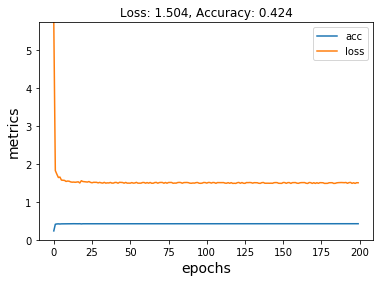

In [1427]:
plot_loss_accuracy(history)
plt.xlabel('epochs',fontsize=14)
plt.ylabel('metrics',fontsize=14)
plt.savefig('metricsDNN.pdf')

In [1157]:
y_pred = model.predict_classes(X_topred, verbose=0)
print(y_pred[400:600])

ValueError: Error when checking : expected dense_211_input to have shape (None, 43) but got array with shape (1512, 29)

In [72]:
ya_pred = model.predict_classes(Xa_topred, verbose=0)
print(ya_pred[100:200])

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [74]:
# trans_short.set_index(['AGE','DEPARTMENT'],inplace=False)
trans_age_depto=trans_short.groupby(['AGE','DEPARTMENT']).sum().reset_index()[['AGE','DEPARTMENT','QUANTITY','SALES_VALUE','PAID_BY_CUSTOMER','RETAIL_DISC']]

In [75]:
trans_short.set_index(['HH_COMP_NUMBER','DEPARTMENT'],inplace=False)
trans_hh_depto=trans_short.groupby(['HH_COMP_NUMBER','DEPARTMENT']).sum().reset_index()[['HH_COMP_NUMBER','DEPARTMENT','QUANTITY','SALES_VALUE','PAID_BY_CUSTOMER','RETAIL_DISC']]

In [76]:
trans_age_depto.head()

,AGE,DEPARTMENT,QUANTITY,SALES_VALUE,PAID_BY_CUSTOMER,RETAIL_DISC
0,1.00,,0,0.00,0.00,0.00
1,1.00,AUTOMOTIVE,2,11.64,11.64,0.00
2,1.00,CHEF SHOPPE,28,77.31,77.31,0.00
3,1.00,CNTRL/STORE SUP,2,2.00,2.00,0.00
4,1.00,COSMETICS,189,778.31,881.32,-103.01


In [218]:
trans_short.groupby('STORE_ID').sum().reset_index()

,STORE_ID,household_key,DAY,WEEK_NO,PRODUCT_ID,SALES_VALUE,PAID_BY_CUSTOMER,AGE,HH_COMP_NUMBER,RETAIL_DISC,MIN_INCOME,QUANTITY
0,1,7199,188,30,8582014,29.89,30.85,2,2,-0.96,50000,9689
1,2,4898,925,134,1423897,18.28,18.28,6,10,0.00,350000,2
2,12,8980,1528,220,13607698,12.06,14.75,0,0,-2.69,0,5
3,19,4240,1222,176,991287,20.00,20.49,0,0,-0.49,0,4858
4,20,4240,708,102,991287,20.00,20.46,0,0,-0.46,0,4590
5,21,2680,202,32,7878528,7.35,10.26,20,20,-2.91,140000,4
6,22,3268,872,128,2911872,24.77,25.99,12,20,-1.22,600000,4
7,26,4240,868,126,1276531,1.75,2.04,0,0,-0.29,0,2
8,27,1239961,152016,22319,1882013806,"2,846.64","3,326.00",895,664,-479.01,12375000,1051
9,37,1473,1404,204,2071373,7.27,7.27,12,3,0.00,225000,3


In [214]:
trans_by_prod=trans_short.groupby('PRODUCT_ID',sort=True).sum().reset_index()

In [690]:
trans_short.set_index(['STORE_ID','WEEK_NO'],inplace=False)
trans_store_week=trans_short.groupby(['STORE_ID','WEEK_NO']).sum().reset_index()[['STORE_ID','WEEK_NO','SALES_VALUE','PAID_BY_CUSTOMER','RETAIL_DISC']]

In [691]:
trans_store_week.head()

,STORE_ID,WEEK_NO,SALES_VALUE,PAID_BY_CUSTOMER,RETAIL_DISC
0,1,5,22.40,23.12,-0.72
1,1,6,5.00,5.24,-0.24
2,1,14,2.49,2.49,0.00
3,2,41,4.29,4.29,0.00
4,2,93,13.99,13.99,0.00


In [689]:
trans_store.head(20)

,STORE_ID,WEEK_NO,SALES_VALUE,PAID_BY_CUSTOMER,RETAIL_DISC
0,1,30,29.89,30.85,-0.96
1,2,134,18.28,18.28,0.00
2,12,220,12.06,14.75,-2.69
3,19,176,20.00,20.49,-0.49
4,20,102,20.00,20.46,-0.46
5,21,32,7.35,10.26,-2.91
6,22,128,24.77,25.99,-1.22
7,26,126,1.75,2.04,-0.29
8,27,22319,"2,846.64","3,326.00",-479.01
9,37,204,7.27,7.27,0.00


In [327]:
print('The store that sells more is: ',trans_store[trans_store['SALES_VALUE']==trans_store['SALES_VALUE'].max()]['STORE_ID'].iloc[0])

The store that sells more is:  367


In [81]:
print('The best sold product is ',trans_by_prod[trans_by_prod['QUANTITY']==trans_by_prod['QUANTITY'].max()]['PRODUCT_ID'].iloc[0])

The best sold product is  6534178


In [686]:
prod[prod['PRODUCT_ID']==trans_by_prod[trans_by_prod['QUANTITY']==trans_by_prod['QUANTITY'].max()]['PRODUCT_ID'].iloc[0]]

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


In [687]:
print('The best sold product is ',trans_by_prod[trans_by_prod['SALES_VALUE']==trans_by_prod['SALES_VALUE'].max()]['PRODUCT_ID'].iloc[0])

The best sold product is  6534178


In [688]:
prod[prod['PRODUCT_ID']==trans_by_prod[trans_by_prod['SALES_VALUE']==trans_by_prod['SALES_VALUE'].max()]['PRODUCT_ID'].iloc[0]]

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


In [10]:
trans_week=trans_short.groupby('WEEK_NO').sum().reset_index()[['WEEK_NO','SALES_VALUE','PAID_BY_CUSTOMER','RETAIL_DISC']]

In [11]:
print('The best week for retailers was ',trans_week[trans_week['SALES_VALUE']==trans_week['SALES_VALUE'].max()]['WEEK_NO'].iloc[0])

The best week for retailers was  92


In [1175]:
trans_short.set_index(['WEEK_NO','STORE_ID'],inplace=False)
trans_store_week=trans_short.groupby(['WEEK_NO','STORE_ID']).sum().reset_index()[['WEEK_NO','STORE_ID','QUANTITY','SALES_VALUE','PAID_BY_CUSTOMER','RETAIL_DISC']]

In [1176]:
trans_store_week.head()

,WEEK_NO,STORE_ID,QUANTITY,SALES_VALUE,PAID_BY_CUSTOMER,RETAIL_DISC
0,1,27,20,32.59,36.54,-3.95
1,1,286,5,19.35,20.65,-1.30
2,1,288,50,113.72,132.52,-18.80
3,1,292,32,69.54,79.13,-9.59
4,1,295,2,1.58,2.78,-1.20


In [925]:
trans_short.set_index(['household_key','DAY'],inplace=False)
trans_customer_day=trans_short.groupby(['household_key','DAY']).sum().reset_index()[['household_key', 'DAY','QUANTITY','SALES_VALUE','PAID_BY_CUSTOMER',
        'RETAIL_DISC']]

In [940]:
trans_short.set_index(['household_key','WEEK_NO'],inplace=False)
trans_customer_week=trans_short.groupby(['household_key','WEEK_NO']).sum().reset_index()[['household_key', 'WEEK_NO','QUANTITY','SALES_VALUE','PAID_BY_CUSTOMER',
        'RETAIL_DISC','MIN_INCOME']]

In [941]:
trans_customer_week.head()

,household_key,WEEK_NO,QUANTITY,SALES_VALUE,PAID_BY_CUSTOMER,RETAIL_DISC,MIN_INCOME
0,1,8,34,78.66,95.20,-16.54,1050000
1,1,10,14,41.10,49.69,-8.59,420000
2,1,13,13,26.90,33.62,-6.72,420000
3,1,14,32,63.43,75.01,-11.08,805000
4,1,15,20,53.45,69.87,-16.42,595000


In [1235]:
minAge={'65+':65,'45-54':45, '25-34':25, '35-44':35, '19-24':19, '55-64':55}
dem['AGE']= dem['AGE_DESC'].map(minAge)

In [515]:
dem.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,MIN_INCOME,MAX_INCOME,AGE
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,35000,49000,65
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7,50000,74000,45
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8,25000,34000,25
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13,75000,99000,25
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16,50000,74000,45


In [932]:
trans_customer_week['PAID_BY_CUSTOMER'].sort_values(ascending=False).head(5)

50512    299.99
102946   299.99
106679   264.48
37600    214.99
2961     200.40
Name: PAID_BY_CUSTOMER, dtype: float64

In [933]:
trans_customer_week[trans_customer_week.index==75592]

,household_key,WEEK_NO,QUANTITY,SALES_VALUE,PAID_BY_CUSTOMER,RETAIL_DISC,MIN_INCOME
75592,1609,49,133.05,10.78,11.03,-0.24,"125,000.00"


In [369]:
trans_customer_week[trans_customer_week.index==48597]

,household_key,WEEK_NO,QUANTITY,SALES_VALUE,PAID_BY_CUSTOMER,RETAIL_DISC
48597,1023,76,71077,"1,167.93","1,213.28",-45.10


In [370]:
trans_customer_week[trans_customer_week.index==48613]

,household_key,WEEK_NO,QUANTITY,SALES_VALUE,PAID_BY_CUSTOMER,RETAIL_DISC
48613,1023,92,34173,936.67,991.08,-53.61


In [371]:
trans_customer_week[trans_customer_week.index==82457]

,household_key,WEEK_NO,QUANTITY,SALES_VALUE,PAID_BY_CUSTOMER,RETAIL_DISC
82457,1767,94,315,757.28,925.28,-168.00


In [372]:
trans_customer_week[trans_customer_week.index==48541]

,household_key,WEEK_NO,QUANTITY,SALES_VALUE,PAID_BY_CUSTOMER,RETAIL_DISC
48541,1023,20,44851,884.05,916.76,-32.71


In [334]:
trans_customer_day[trans_customer_day['PAID_BY_CUSTOMER']==trans_customer_day['PAID_BY_CUSTOMER'].max()]

,household_key,DAY,QUANTITY,SALES_VALUE,PAID_BY_CUSTOMER,RETAIL_DISC
138886,1609,339,15720,997.51,"1,008.08",-10.57


In [934]:
trans_customer_day.head()

,household_key,DAY,QUANTITY,SALES_VALUE,PAID_BY_CUSTOMER,RETAIL_DISC
0,1,51,34,78.66,95.20,-16.54
1,1,67,14,41.10,49.69,-8.59
2,1,88,13,26.90,33.62,-6.72
3,1,94,32,63.43,75.01,-11.08
4,1,101,20,53.45,69.87,-16.42


In [ ]:
trans_store_week

In [1165]:
trans_week=trans_store_week.groupby('WEEK_NO').mean().reset_index()

In [1172]:
trans_week.head()

,WEEK_NO,STORE_ID,QUANTITY,SALES_VALUE,PAID_BY_CUSTOMER,RETAIL_DISC
0,1,"2,753.96",34.60,76.63,91.93,-15.25
1,2,"2,457.15",78.51,117.62,141.02,-23.34
2,3,"2,808.47",634.90,148.33,176.47,-28.00
3,4,"2,815.69",711.71,147.83,174.64,-26.70
4,5,"2,683.29",908.09,179.82,215.38,-35.38


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef695c8470>]], dtype=object)

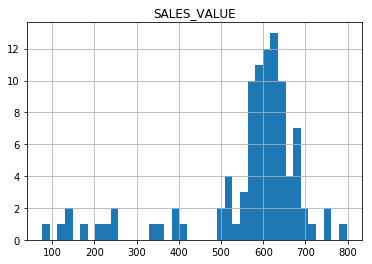

In [1171]:
trans_week.hist(column='SALES_VALUE',bins=40)

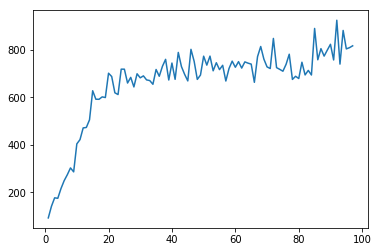

In [1174]:
plt.plot(trans_week['WEEK_NO'],trans_week['PAID_BY_CUSTOMER'])

In [1177]:
trans_week['SALES_VALUE'].mean()

564.14801346880188

In [1196]:
len(xsp)

200

In [1210]:
from scipy import stats

salesv_histo=np.histogram(trans_store_week['SALES_VALUE'],bins=100)
ysv=np.log(salesv_histo[0])
xsv=salesv_histo[1][:-1]

slopev, interceptv, r_valuev, p_valuev, std_errv = stats.linregress(xsv[40:90],ysv[40:90])
e=np.exp(interceptv)*np.exp(slopev*xsv)
line = slopev*xsv+interceptv

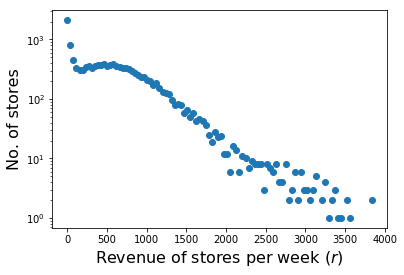

In [1212]:
fig=plt.figure(figsize=(6,4))

#plt.xlim(0,3000)
#plt.ylim(1,10000)
plt.ylabel('No. of stores',fontsize=16)
plt.xlabel('Revenue of stores per week ($r$)',fontsize=16)
plt.yscale('log')
plt.plot(salesv_histo[1][:-1],salesv_histo[0],'o',salesv_histo[1][:-1],e, '-k',lw=3)
plt.savefig('histoSALES_STORE.pdf')

In [522]:
from scipy import stats

minincome_histo=np.histogram(dem['MIN_INCOME'],bins=6)
ys=np.log(minincome_histo[0])
xs=minincome_histo[1][:-1]
e=np.exp(intercept)*np.exp(slope*xs)

slope, intercept, r_value, p_value, std_err = stats.linregress(xs[2:60],ys[2:60])
line = slope*xs+intercept

In [546]:
dem.count().ix[0]

801

In [594]:
fracs_income=[]
explode=[0,0,0,0,0.1,0,0,0,0,0,0,0]
colors=['aqua','gold', 'yellowgreen', 'orangered', 'lightskyblue','red','olive','orange','magenta','yellow','lime','khaki']
for i in [1,15000,25000,35000,50000,75000,100000,125000,150000,175000, 200000,250000]:
    fracs_income.append(dem[dem['MIN_INCOME']==i].count().ix[0]/dem.count().ix[0])

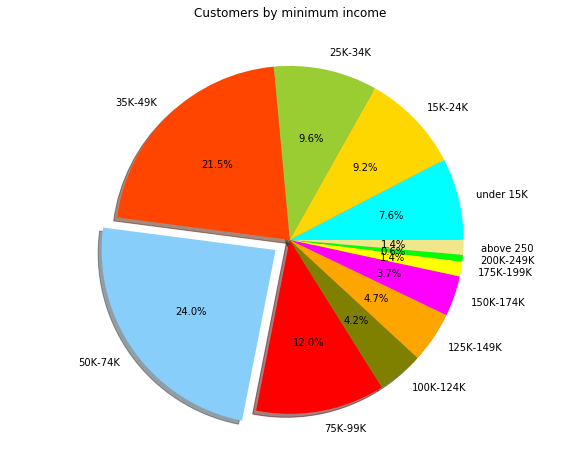

In [595]:
fig=plt.figure(figsize=(10,8))
plt.axis('equal')
plt.title('Customers by minimum income')
labels=['under 15K','15K-24K','25K-34K','35K-49K','50K-74K','75K-99K','100K-124K','125K-149K','150K-174K','175K-199K','200K-249K', 'above 250']
plt.pie(fracs_income, explode=explode,labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.savefig('pie_income.pdf')

In [597]:
fracs_age=[]
explode=[0,0,0,0.1,0,0]
colors=['aqua','gold', 'yellowgreen', 'orangered', 'lightskyblue','red']
for i in [19,25,35,45,55,65]:
    fracs_age.append(dem[dem['AGE']==i].count().ix[0]/dem.count().ix[0])

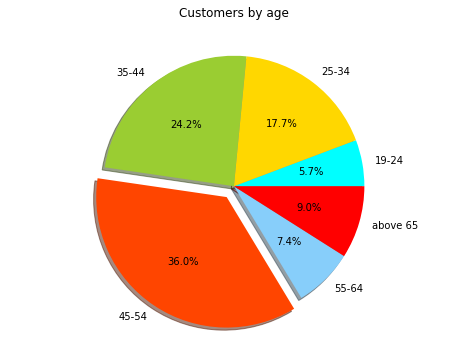

In [598]:
fig=plt.figure(figsize=(8,6))
plt.axis('equal')
plt.title('Customers by age')
labels=['19-24','25-34','35-44','45-54','55-64','above 65']
plt.pie(fracs_age, explode=explode,labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.savefig('pie_age.pdf')

In [949]:
from scipy import stats

paid_histo=np.histogram(trans_customer_week['PAID_BY_CUSTOMER'],bins=200)
ysp=np.log(paid_histo[0])
xsp=paid_histo[1][:-1]

slopep, interceptp, r_valuep, p_valuep, std_errp = stats.linregress(xsp[2:60],ysp[2:60])
e=np.exp(interceptp)*np.exp(slopep*xsp)
line = slopep*xs+interceptp

In [950]:
print(1/slopep)

-75.8127878686


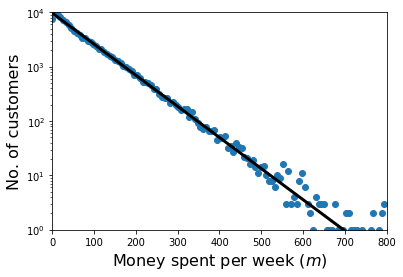

In [952]:
fig=plt.figure(figsize=(6,4))

plt.xlim(0,800)
plt.ylim(1,10000)
plt.ylabel('No. of customers',fontsize=16)
plt.xlabel('Money spent per week ($m$)',fontsize=16)
plt.yscale('log')
plt.plot(paid_histo[1][:-1],paid_histo[0],'o',paid_histo[1][:-1],e, '-k',lw=3)
plt.savefig('histoPAIDperWEEK.pdf')

In [714]:
trans_by_prod['SALES_VALUE'].max()

477754.4900000089

In [953]:
trans_store_week

from scipy import stats

sales_histo=np.histogram(trans_by_prod['SALES_VALUE'],bins=8000)
ys=np.log10(sales_histo[0])
xs=np.log10(sales_histo[1][1:-1])
print(ys[1:40])
pl=np.exp(intercept+slope*sales_histo[1][1:-1])

#slopea, intercepta, r_value, p_value, std_err = stats.linregress(xs[1:10],ys[1:10])
#linea = slopea*xs+intercepta

slope, intercept, r_value, p_value, std_err = stats.linregress(xs[10:40],ys[10:40])
line = slope*xs+intercept
print(slope)
print(intercept)

[ 3.87592898  3.55364034  3.32035403  3.15563963  2.99166901  2.84447718
  2.73798733  2.5797836   2.48713838  2.36921586  2.24797327  2.1172713
  2.20139712  1.98677173  1.96848295  1.92427929  1.88649073  1.65321251
  1.5563025   1.60205999  1.64345268  1.5797836   1.53147892  1.47712125
  1.50514998  1.36172784  1.38021124  1.23044892  1.2787536   1.04139269
  1.20411998  1.14612804  1.04139269  1.36172784  0.77815125  0.84509804
  0.95424251  1.          1.04139269]
-2.58517338651
9.65213188385


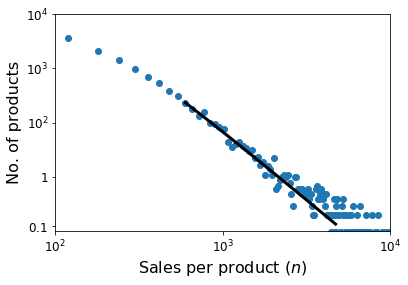

In [956]:
import matplotlib.axes as ax
fig=plt.figure(figsize=(6,4))
plt.xlim(2,4)
plt.ylim(0.01,4)
plt.xticks([2,3,4],['$10^2$','$10^3$','$10^4$'],fontsize=12)
plt.yticks([0.1,1,2,3,4],['$0.1$','$1$','$10^2$','$10^3$','$10^4$'],fontsize=12)
plt.ylabel('No. of products',fontsize=16)
plt.xlabel('Sales per product ($n$)',fontsize=16)
plt.plot(np.log10(sales_histo[1][:-1]),np.log10(sales_histo[0]),'o',np.log10(sales_histo[1][10:80]),line[10:80],'-k',lw=3)
#plt(np.log10(sales_histo[1][1:10]),linea[1:10],'-k',lw=2)
plt.savefig('histoSALESperPRODUCT.pdf')

In [132]:
trans_customer_day['DAY'].min()

1

In [133]:
trans_customer_day['DAY'].max()

677

In [134]:
days=[]
sales=[]
for i in range(1,2501):
    days.append(np.array(trans_customer_day[trans_customer_day['household_key']==i]['DAY']))
    sales.append(np.array(trans_customer_day[trans_customer_day['household_key']==i]['SALES_VALUE']))
    

In [18]:
a=np.ones(10)

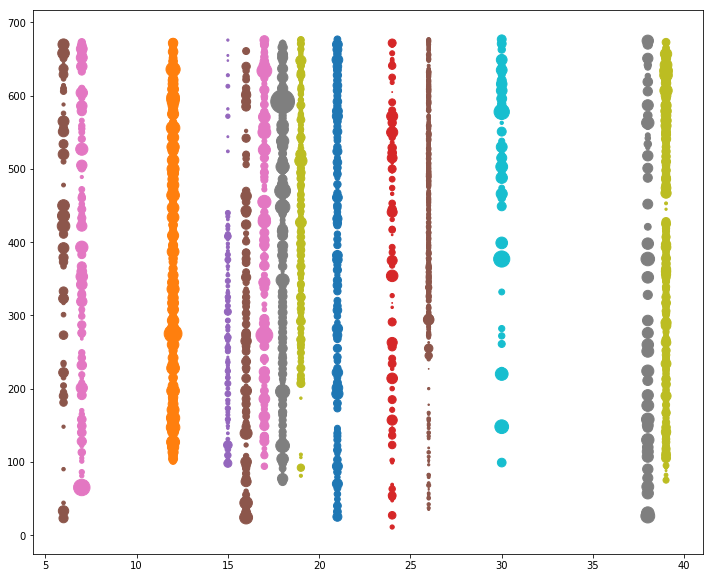

In [137]:
plt.figure(figsize=(12,10))
for i in range(1,40):
    plt.scatter(i*np.ones(len(days[i])),days[i],sales[i])

In [138]:
days=[]
sales=[]
for i in range(1,2501):
    days.append(list(trans_customer_day[trans_customer_day['household_key']==i]['DAY']))
    sales.append(list(trans_customer_day[trans_customer_day['household_key']==i]['SALES_VALUE']))
    

In [21]:
c=1
a=0
newdays=[]
newsales=[0]
while (a<len(days[0])):
    while(c < days[0][a]): 
        newdays.append(c)
        newsales.append(0)
        c+=1
    newsales.pop()
    newsales.append(sales[0][a])
    a+=1
while(c <= trans_customer_day['DAY'].max()): 
        newdays.append(c)
        newsales.append(0)
        c+=1



In [145]:
def days_sales(age):
    days=[]
    sales=[]
    for i in range(1,2501):
        if(trans_day[trans_day['household_key']==i]['AGE'].iloc[0]==age):
            days.append(np.array(trans_day[trans_day['household_key']==i]['DAY']))
            sales.append(np.array(trans_day[trans_day['household_key']==i]['SALES_VALUE']))
    alldays=[]
    allsales=[]
    for i in range(0,len(days)):
        c=1
        a=0
        newdays=[]
        newsales=[0]
        while (a<len(days[i])):
            while(c < days[i][a]): 
                newdays.append(c)
                newsales.append(0)
                c+=1
            newsales.pop()
            newsales.append(sales[i][a])
            a+=1
        while(c <= trans_customer_day['DAY'].max()): 
                newdays.append(c)
                newsales.append(0)
                c+=1
        newsales.pop()
        alldays.append(newdays)
        allsales.append(newsales)
    return alldays,allsales
    
    

In [147]:
days0, sales0 = days_sales(0)
days19, sales19 = days_sales(1)
days25, sales25 = days_sales(2)
days35, sales35 = days_sales(3)
days45, sales45 = days_sales(4)
days55, sales55 = days_sales(5)
days65, sales65 = days_sales(6)

In [191]:
def week_paid(age):
    week=[]
    paid=[]
    for i in range(1,2501):
        if(trans_week[trans_week['household_key']==i]['AGE'].iloc[0]==age):
            week.append(np.array(trans_week[trans_week['household_key']==i]['WEEK_NO']))
            paid.append(np.array(trans_week[trans_week['household_key']==i]['PAID_BY_CUSTOMER']))
    allweek=[]
    allpaid=[]
    for i in range(0,len(week)):
        c=1
        a=0
        newweek=[]
        newpaid=[0]
        while (a<len(week[i])):
            while(c < week[i][a]): 
                newweek.append(c)
                newpaid.append(0)
                c+=1
            newpaid.pop()
            newpaid.append(paid[i][a])
            a+=1
        while(c <= trans_week['WEEK_NO'].max()): 
                newweek.append(c)
                newpaid.append(0)
                c+=1
        newpaid.pop()
        allweek.append(newweek)
        allpaid.append(newpaid)
    return allweek,allpaid
    

In [192]:
week0, paid0 = week_paid(0)
week19, paid19 = week_paid(1)
week25, paid25 = week_paid(2)
week35, paid35 = week_paid(3)
week45, paid45 = week_paid(4)
week55, paid55 = week_paid(5)
week65, paid65 = week_paid(6)

In [193]:
len(week19)

46

288


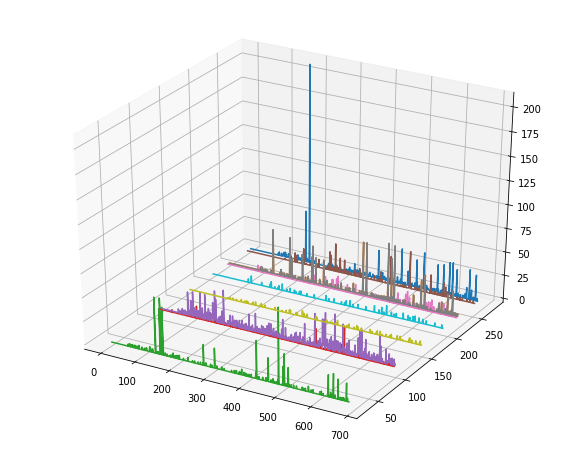

In [205]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')
v=np.random.randint(len(sales45),size=10)
print(len(sales45))
for i in v:
    ax.plot(days45[i],1*i*np.ones(len(days45[i])),sales45[i])

In [471]:
np.linspace(1,100,10,dtype=int)

array([  1,  12,  23,  34,  45,  56,  67,  78,  89, 100])

288


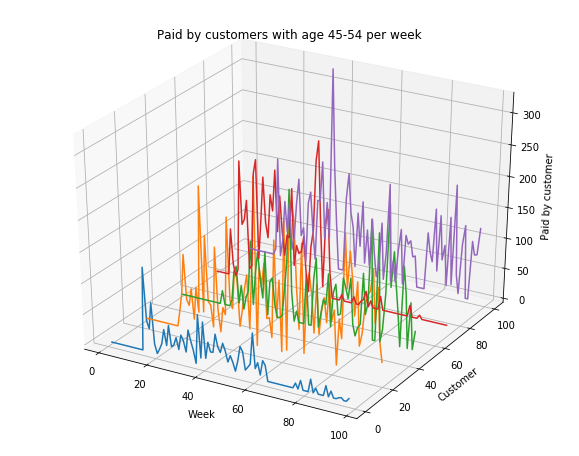

In [599]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')
ax.set_title('Paid by customers with age 45-54 per week')
ax.set_xlabel('Week')
ax.set_ylabel('Customer')
ax.set_zlabel('Paid by customer')
v=np.linspace(1,100,5,dtype=int)
print(len(paid45))
for i in v:
    plt.plot(week45[i],1*i*np.ones(len(week45[i])),paid45[i])

[0 1 2 3 4]


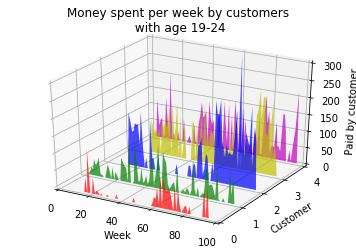

In [658]:

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')
def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

xs = week19[0]
verts = []
zs=np.linspace(0,4,5,dtype=int)
print(zs)
for i in zs:
    ys = paid19[i]
    ys[0], ys[-1] = 0, 0
    verts.append(list(zip(xs, ys)))

poly = PolyCollection(verts, facecolors=[cc('r'), cc('g'), cc('b'),
                                         cc('y'), cc('m')])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_yticks([0,1,2,3,4])
ax.set_yticklabels(['0', '1', '2','3','4'])
ax.set_xlim3d(0, 100)
ax.set_ylim3d(0, 4)
ax.set_zlim3d(0, 300)

ax.set_xlabel('Week')
ax.set_ylabel('Customer')
ax.set_zlabel('Paid by customer')

plt.title('Money spent per week by customers\n with age 19-24')
plt.savefig('customers19-24_week.pdf')

194


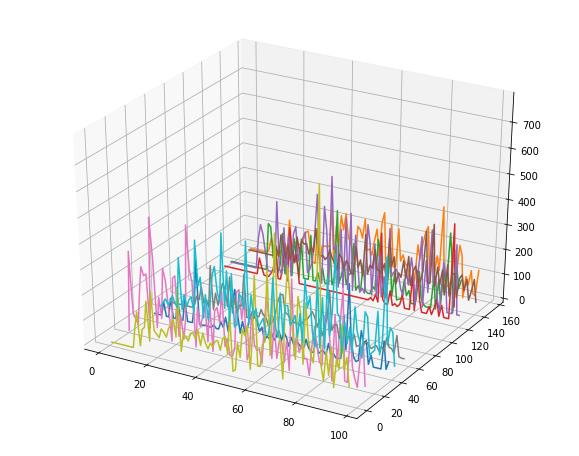

In [199]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')
v=np.random.randint(len(paid35),size=10)
print(len(paid35))
for i in v:
    ax.plot(week35[i],1*i*np.ones(len(week35[i])),paid35[i])

194


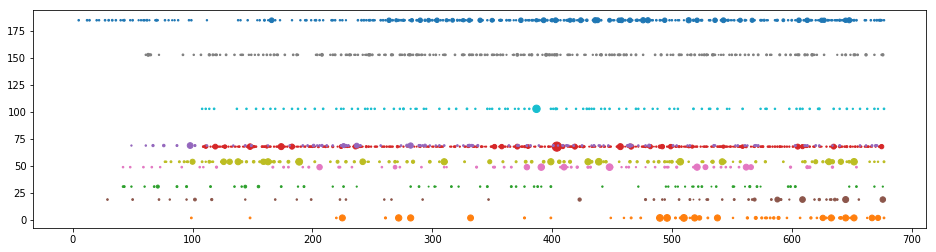

In [200]:
v=np.random.randint(len(sales35),size=10)
plt.figure(figsize=(16,4))
print(len(sales35))
for i in v:
    plt.scatter(days35[i],i*np.ones(len(days35[i])),sales35[i])

72


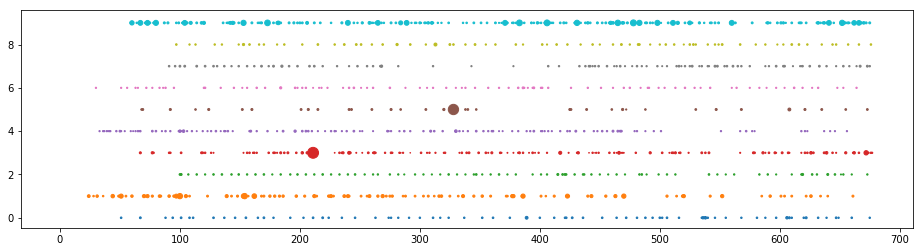

In [201]:
plt.figure(figsize=(16,4))
print(len(sales65))
for i in range(0,10):
    plt.scatter(days65[i],i*np.ones(len(days65[i])),sales65[i])

In [958]:
trans_by_prod=trans_short.groupby('PRODUCT_ID',sort=True).sum().reset_index()

In [ ]:
trans_short.drop(trans_short[trans_short['AGE']==0].index,inplace=True)

In [1237]:
trans_short['AGE']=trans_short['AGE'].map(minAge)

In [1238]:
trans_short.head()

,household_key,DAY,WEEK_NO,PRODUCT_ID,STORE_ID,SALES_VALUE,PAID_BY_CUSTOMER,DEPARTMENT,AGE,HH_COMP_NUMBER,RETAIL_DISC,MIN_INCOME,QUANTITY
0,2375,1,1,1004906,364,1.39,1.99,PRODUCE,nan,0,-0.60,0,1
1,2375,1,1,1033142,364,0.82,0.82,PRODUCE,nan,0,0.00,0,1
2,2375,1,1,1036325,364,0.99,1.29,PRODUCE,nan,0,-0.30,0,1
3,2375,1,1,1082185,364,1.21,1.21,PRODUCE,nan,0,0.00,0,1
4,2375,1,1,8160430,364,1.50,1.89,PRODUCE,nan,0,-0.39,0,1


In [1263]:

trans_short.set_index(['AGE','DEPARTMENT'],inplace=False)
trans_age_depto=trans_short.groupby(['AGE','DEPARTMENT']).mean().reset_index()[['AGE','DEPARTMENT','SALES_VALUE','PAID_BY_CUSTOMER','RETAIL_DISC','MIN_INCOME']]
trans_age_depto=trans_age_depto[trans_age_depto['AGE']!=0]

In [1248]:
trans_age_depto.head(10)

,AGE,DEPARTMENT,SALES_VALUE,PAID_BY_CUSTOMER,RETAIL_DISC,MIN_INCOME


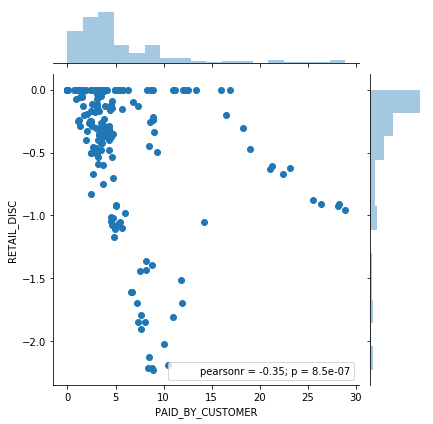

In [1214]:
sns.jointplot(x=trans_age_depto['PAID_BY_CUSTOMER'],y=trans_age_depto['RETAIL_DISC'],data=trans_age_depto)

In [1245]:
trans_age_depto.head(10)


,AGE,DEPARTMENT,SALES_VALUE,PAID_BY_CUSTOMER,RETAIL_DISC,MIN_INCOME


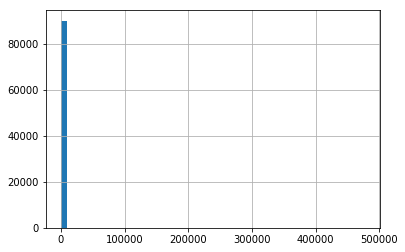

In [705]:
trans_by_prod['SALES_VALUE'].hist(bins=50)

In [959]:
trans_by_prod.head()

,PRODUCT_ID,household_key,DAY,WEEK_NO,STORE_ID,SALES_VALUE,PAID_BY_CUSTOMER,AGE,HH_COMP_NUMBER,RETAIL_DISC,MIN_INCOME,QUANTITY
0,25671,1911,814,118,9770,20.94,20.94,115,2,0.00,225000,6
1,26081,1675,250,36,3235,0.99,0.99,0,0,0.00,0,1
2,26093,1032,458,66,33904,1.59,1.59,0,0,0.00,0,1
3,26190,1420,238,35,3297,1.54,1.54,0,0,0.00,0,1
4,26355,486,242,35,3217,1.98,2.50,0,0,-0.52,0,2


In [960]:
prod[prod['PRODUCT_ID']==trans_by_prod[trans_by_prod['SALES_VALUE']==trans_by_prod['SALES_VALUE'].max()]['PRODUCT_ID'].iloc[0]]

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


In [961]:
trans_by_prod[trans_by_prod['PAID_BY_CUSTOMER']==trans_by_prod['PAID_BY_CUSTOMER'].max()]['PRODUCT_ID']

56505    6534178
Name: PRODUCT_ID, dtype: int64

In [1216]:
trans_age_depto[trans_age_depto['PAID_BY_CUSTOMER']==trans_age_depto['PAID_BY_CUSTOMER'].max()]

,AGE,DEPARTMENT,SALES_VALUE,PAID_BY_CUSTOMER,RETAIL_DISC,MIN_INCOME
187,5,KIOSK-GAS,27.95,28.91,-0.95,"76,756.96"


Delete the 10 most sold products to see the tail

In [1118]:
for i in range(15): trans_age_depto.drop(trans_age_depto[trans_age_depto['PAID_BY_CUSTOMER']==trans_age_depto['PAID_BY_CUSTOMER'].max()].index,axis=0,inplace=True)

In [988]:
df=trans_age_depto.sort_values(by='PAID_BY_CUSTOMER',ascending=False)[['AGE','DEPARTMENT','PAID_BY_CUSTOMER']]

In [1015]:
trans_age_depto.pivot('AGE','DEPARTMENT','PAID_BY_CUSTOMER').columns

Index([' ', 'AUTOMOTIVE', 'CHEF SHOPPE', 'CNTRL/STORE SUP', 'COSMETICS',
       'COUP/STR & MFG', 'DAIRY DELI', 'DELI', 'DELI/SNACK BAR', 'DRUG GM',
       'FLORAL', 'FROZEN GROCERY', 'GARDEN CENTER', 'GM MERCH EXP',
       'GRO BAKERY', 'GROCERY', 'HBC', 'HOUSEWARES', 'KIOSK-GAS', 'MEAT',
       'MEAT-PCKGD', 'MEAT-WHSE', 'MISC SALES TRAN', 'MISC. TRANS.',
       'NUTRITION', 'PASTRY', 'PHARMACY SUPPLY', 'PHOTO', 'POSTAL CENTER',
       'PROD-WHS SALES', 'PRODUCE', 'RESTAURANT', 'RX', 'SALAD BAR', 'SEAFOOD',
       'SEAFOOD-PCKGD', 'SPIRITS', 'TOYS', 'TRAVEL & LEISUR', 'VIDEO RENTAL'],
      dtype='object', name='DEPARTMENT')

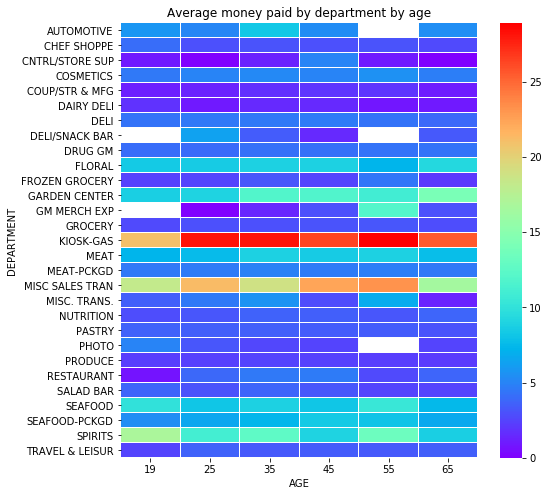

In [1264]:
fig=plt.figure(figsize=(8,8))
plt.title('Average money paid by department by age')
transforheat=trans_age_depto.pivot('DEPARTMENT','AGE','PAID_BY_CUSTOMER').drop([' ','RX','GRO BAKERY','HBC','HOUSEWARES','MEAT-WHSE','PHARMACY SUPPLY','POSTAL CENTER', 'PROD-WHS SALES','TOYS', 'VIDEO RENTAL'],axis=0)
ax=sns.heatmap(transforheat,annot=False,cmap="rainbow", linewidths=.1,)
plt.savefig('heatAGE_DEPTOmean.pdf',pad_inches=5)

In [999]:
trans_short.set_index(['HH_COMP_NUMBER','DEPARTMENT'],inplace=False)
trans_hh_depto=trans_short.groupby(['HH_COMP_NUMBER','DEPARTMENT']).sum().reset_index()[['HH_COMP_NUMBER','DEPARTMENT','SALES_VALUE']]

In [ ]:
hh_code={'Single Female':1, 'Single Male':-1, '1 Adult Kids':2, '2 Adults No Kids':-2, '2 Adults Kids':3, 'Unknown':0,
        }

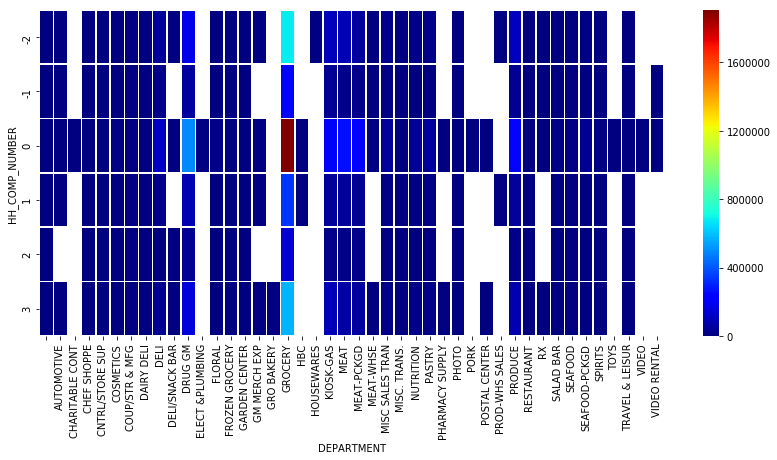

In [1001]:
fig=plt.figure(figsize=(14,6))
transhforheat=trans_hh_depto.pivot('HH_COMP_NUMBER','DEPARTMENT','SALES_VALUE')
ax=sns.heatmap(transhforheat,annot=False,cmap="jet", linewidths=.5)

In [196]:
trans_short.head()

,household_key,DAY,WEEK_NO,PRODUCT_ID,STORE_ID,SALES_VALUE,PAID_BY_CUSTOMER,DEPARTMENT,AGE,HH_COMP_NUMBER,RETAIL_DISC,MIN_INCOME,QUANTITY
0,2375,1,1,1004906,364,1.39,1.99,PRODUCE,0,0,-0.60,0,1
1,2375,1,1,1033142,364,0.82,0.82,PRODUCE,0,0,0.00,0,1
2,2375,1,1,1036325,364,0.99,1.29,PRODUCE,0,0,-0.30,0,1
3,2375,1,1,1082185,364,1.21,1.21,PRODUCE,0,0,0.00,0,1
4,2375,1,1,8160430,364,1.50,1.89,PRODUCE,0,0,-0.39,0,1


In [1046]:
trans_week=trans_short.groupby('WEEK_NO').mean().reset_index()[['WEEK_NO','SALES_VALUE','PAID_BY_CUSTOMER','RETAIL_DISC']]

In [1047]:
trans_week.head()

,WEEK_NO,SALES_VALUE,PAID_BY_CUSTOMER,RETAIL_DISC
0,1,2.77,3.32,-0.55
1,2,2.94,3.53,-0.58
2,3,2.81,3.34,-0.53
3,4,2.97,3.51,-0.54
4,5,2.81,3.37,-0.55


Text(0,0.5,'Average sales value')

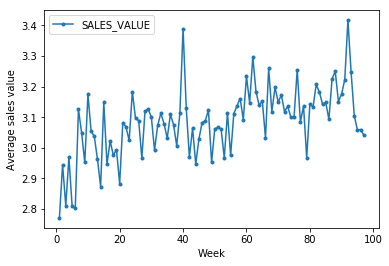

In [1049]:
fig=plt.figure(figsize=(10,6))
trans_week.plot(x='WEEK_NO',y='SALES_VALUE',style='.-')
plt.xlabel('Week')
plt.ylabel('Average sales value')

In [194]:
trans_week.head()

,WEEK_NO,SALES_VALUE,PAID_BY_CUSTOMER,RETAIL_DISC
0,1,2.770420,3.323317,-0.551435
1,2,2.944585,3.530356,-0.584384
2,3,2.810369,3.343556,-0.530535
3,4,2.968208,3.506356,-0.536150
4,5,2.809685,3.365265,-0.552743


In [1056]:
sales_week=trans_week[['SALES_VALUE']][0:].reset_index(level=0)

In [1057]:
sales_week.drop('index',axis=1,inplace=True)

In [1058]:
sales_week['WEEK']=sales_week.index +1
data=sales_week[['WEEK','SALES_VALUE']]

In [1059]:
data.set_index('WEEK',inplace=True)

In [1060]:
data.head()

,SALES_VALUE
WEEK,
1,2.77
2,2.94
3,2.81
4,2.97
5,2.81


Text(0,0.5,'sales')

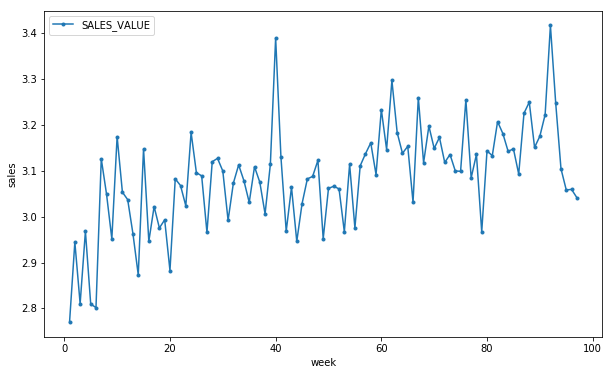

In [1061]:
fig=plt.figure(figsize=(10,6))
sales_week.plot(x='WEEK',y='SALES_VALUE',figsize=(10,6),style='.-')
plt.xlabel('week')
plt.ylabel('sales')

In [1068]:
import sys
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams


def check_stationarity(timeseries):
    
    # Determine rolling statistics (moving averages and variance)
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.savefig('rollmean.pdf')
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [1062]:
# Converting to a series object for convenience
ts = data['SALES_VALUE'] 
ts.head()

WEEK
1   2.77
2   2.94
3   2.81
4   2.97
5   2.81
Name: SALES_VALUE, dtype: float64

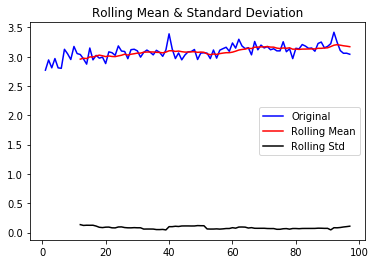

Results of Dickey-Fuller Test:
Test Statistic                -4.21
p-value                        0.00
#Lags Used                     1.00
Number of Observations Used   95.00
Critical Value (5%)           -2.89
Critical Value (1%)           -3.50
Critical Value (10%)          -2.58
dtype: float64


In [1063]:
check_stationarity(ts)

In [ ]:
#If the series is not stationary
#ts_log = np.log(ts)
#plt.plot(ts_log)

WEEK
1     nan
2     nan
3     nan
4     nan
5     nan
6     nan
7     nan
8    0.14
9    0.02
10   0.21
11   0.06
12   0.04
Name: SALES_VALUE, dtype: float64

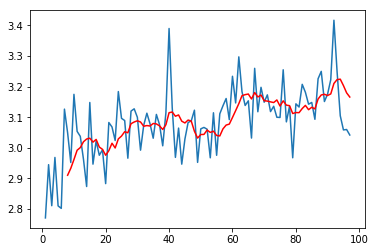

In [1066]:
moving_avg = pd.rolling_mean(ts,8)
plt.plot(ts)
plt.plot(moving_avg, color='red')

# Subtract rolling average
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.head(12)

Results of Dickey-Fuller Test:
Test Statistic                -8.06
p-value                        0.00
#Lags Used                     0.00
Number of Observations Used   89.00
Critical Value (5%)           -2.89
Critical Value (1%)           -3.51
Critical Value (10%)          -2.58
dtype: float64


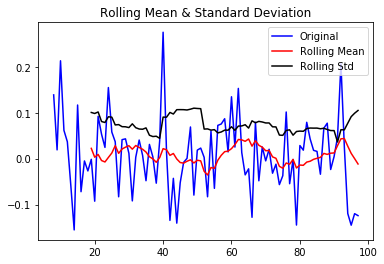

In [1069]:
ts_moving_avg_diff.dropna(inplace=True)
check_stationarity(ts_moving_avg_diff)


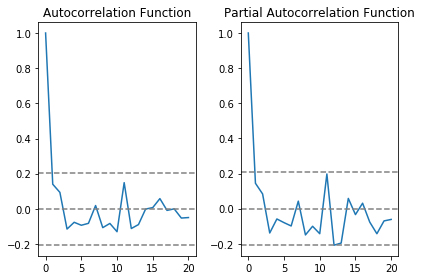

In [1071]:
# ACF (autocorrelation function) and PACF (partial autocorrelation function) plots:
lag_acf = acf(ts_moving_avg_diff, nlags=20)
lag_pacf = pacf(ts_moving_avg_diff, nlags=20, method='ols')

# Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

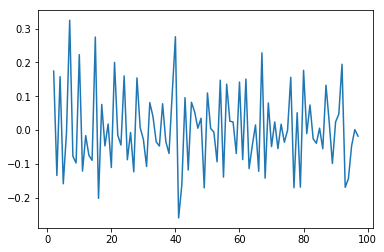

In [1072]:
#Removing trend and seasonality by differencing
ts_diff = ts - ts.shift()
plt.plot(ts_diff)

array([ 2.77041999,  2.94458503,  2.81036852,  2.96820785,  2.80968471,
        2.80169739,  3.12627728,  3.04888473,  2.9517402 ,  3.17465702,
        3.05347181,  3.03719164,  2.96248846,  2.87311278,  3.14799873,
        2.9463126 ,  3.02208357,  2.97541047,  2.99318643,  2.88259574,
        3.08253415,  3.06791579,  3.02366444,  3.18376642,  3.09612214,
        3.0890305 ,  2.96574673,  3.11990945,  3.127265  ,  3.09963871,
        2.99205703,  3.07326056,  3.11295178,  3.07828478,  3.03115133,
        3.10892147,  3.07533897,  3.00625715,  3.11411274,  3.3900226 ,
        3.13042106,  2.9684711 ,  3.06423352,  2.94627593,  3.02847972,
        3.0824009 ,  3.087872  ,  3.12282336,  2.95209179,  3.06171921,
        3.06645382,  3.06062701,  2.96702014,  3.11434659,  2.97527442,
        3.11098054,  3.13717329,  3.16103373,  3.09186693,  3.23371397,
        3.14653618,  3.29723313,  3.18339713,  3.13826295,  3.15343929,
        3.03161867,  3.25976596,  3.11768609,  3.19764312,  3.14

In [1345]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
scaler.fit(sales_week['SALES_VALUE'].values,y=None)
sales_week_norm = scaler.transform(sales_week['SALES_VALUE'])

ValueError: Expected 2D array, got 1D array instead:
array=[ 2.77041999  2.94458503  2.81036852  2.96820785  2.80968471  2.80169739
  3.12627728  3.04888473  2.9517402   3.17465702  3.05347181  3.03719164
  2.96248846  2.87311278  3.14799873  2.9463126   3.02208357  2.97541047
  2.99318643  2.88259574  3.08253415  3.06791579  3.02366444  3.18376642
  3.09612214  3.0890305   2.96574673  3.11990945  3.127265    3.09963871
  2.99205703  3.07326056  3.11295178  3.07828478  3.03115133  3.10892147
  3.07533897  3.00625715  3.11411274  3.3900226   3.13042106  2.9684711
  3.06423352  2.94627593  3.02847972  3.0824009   3.087872    3.12282336
  2.95209179  3.06171921  3.06645382  3.06062701  2.96702014  3.11434659
  2.97527442  3.11098054  3.13717329  3.16103373  3.09186693  3.23371397
  3.14653618  3.29723313  3.18339713  3.13826295  3.15343929  3.03161867
  3.25976596  3.11768609  3.19764312  3.1489492   3.1729288   3.11823934
  3.13563532  3.09968909  3.09904938  3.25498773  3.08459201  3.13583227
  2.96713988  3.14356015  3.13311929  3.20736019  3.18131457  3.14244414
  3.14809851  3.09296361  3.22561924  3.2497923   3.15113663  3.17545579
  3.22260594  3.41704009  3.24783671  3.10454455  3.05828121  3.05960279
  3.04160709].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [1074]:
plt.figure(figsize=(14,6))
plt.plot(sales_week_norm)
plt.xlabel('time')

NameError: name 'sales_week_norm' is not defined

In [1075]:
np.array(ts)

array([ 2.77041999,  2.94458503,  2.81036852,  2.96820785,  2.80968471,
        2.80169739,  3.12627728,  3.04888473,  2.9517402 ,  3.17465702,
        3.05347181,  3.03719164,  2.96248846,  2.87311278,  3.14799873,
        2.9463126 ,  3.02208357,  2.97541047,  2.99318643,  2.88259574,
        3.08253415,  3.06791579,  3.02366444,  3.18376642,  3.09612214,
        3.0890305 ,  2.96574673,  3.11990945,  3.127265  ,  3.09963871,
        2.99205703,  3.07326056,  3.11295178,  3.07828478,  3.03115133,
        3.10892147,  3.07533897,  3.00625715,  3.11411274,  3.3900226 ,
        3.13042106,  2.9684711 ,  3.06423352,  2.94627593,  3.02847972,
        3.0824009 ,  3.087872  ,  3.12282336,  2.95209179,  3.06171921,
        3.06645382,  3.06062701,  2.96702014,  3.11434659,  2.97527442,
        3.11098054,  3.13717329,  3.16103373,  3.09186693,  3.23371397,
        3.14653618,  3.29723313,  3.18339713,  3.13826295,  3.15343929,
        3.03161867,  3.25976596,  3.11768609,  3.19764312,  3.14

Text(0.5,1,'RSS: 0.9496')

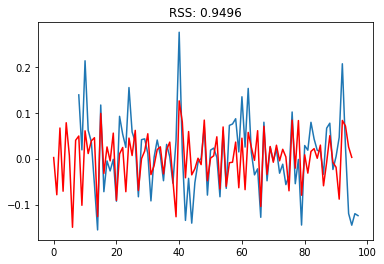

In [1432]:
# Combined model
model = ARIMA(ts.to_frame().dropna().as_matrix(), order=(1, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_moving_avg_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues[6:]-ts_moving_avg_diff)**2))

In [1077]:
results_ARIMA.arparams, results_ARIMA.maparams

(array([-0.47162383]), array([], dtype=float64))

To scale back to original values

In [1078]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

0    0.00
1   -0.08
2    0.07
3   -0.07
4    0.08
dtype: float64


Text(0.5,1,'RMSE: nan')

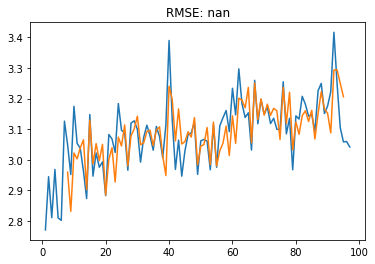

In [1079]:
predictions_ARIMA = predictions_ARIMA_diff+moving_avg
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA.dropna()-ts)**2)/len(ts)))

In [1080]:
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
 
def predict(coef, history):
	yhat = 0.0
	for i in range(1, len(coef)+1):
		yhat += coef[i-1] * history[-i]
	return yhat
 
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)
 

X = np.array(ts)
size = len(X) - 10
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = []
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	ar_coef, ma_coef = results_ARIMA.arparams, results_ARIMA.maparams
	resid = results_ARIMA.resid
	diff = difference(history)
	yhat = history[-1] + predict(ar_coef, diff) #+ predict(ma_coef, resid)
	predictions.append(yhat)
	obs=test[t]
	history.append(obs)
	print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

>predicted=3.163, expected=3.250
>predicted=3.238, expected=3.151
>predicted=3.198, expected=3.175
>predicted=3.164, expected=3.223
>predicted=3.200, expected=3.417
>predicted=3.325, expected=3.248
>predicted=3.328, expected=3.105
>predicted=3.172, expected=3.058
>predicted=3.080, expected=3.060
>predicted=3.059, expected=3.042
Test RMSE: 0.116


In [1081]:
future=pd.DataFrame(results_ARIMA.predict(start = 95, end = 105, dynamic= False)+np.array(moving_avg)[-1],index=list(range(95,106)))
ts_future=pd.concat([predictions_ARIMA,future])

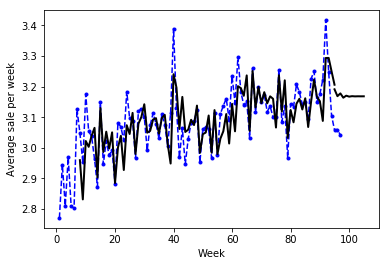

In [1089]:
predictions_ARIMA = predictions_ARIMA_diff+moving_avg
plt.plot(ts,'.--b')
plt.ylabel('Average sale per week')
plt.xlabel('Week')
plt.plot(ts_future,'-k',lw=2)
plt.savefig('arima.pdf')

In [240]:
split_point=60
train, test = sales_week['SALES_VALUE'].values[0:split_point], sales_week['SALES_VALUE'].values[split_point:]

In [ ]:
Isolation Forest

In [ ]:
#Données brutes normées avec StandardScaler
isforest = IsolationForest(n_estimators=20)
isforest.fit(signals_std)
detection_b = isforest.predict(signals_std)
print("Anomalous time series are ", [i+1 for i,x in enumerate(detection_b) if x == -1])

#Amplitudes des signaux  (FFT)
isforest = IsolationForest(n_estimators=40)
isforest.fit(amplitude)
detection_c = isforest.predict(amplitude)
print("Anomalous time series are ", [i+1 for i,x in enumerate(detection_c) if x == -1])

In [ ]:
#Principal components analysis des amplitudes
outliers=[]
for i in range(0,20):
    isforest = IsolationForest(n_estimators=20)
    isforest.fit(pca_amplitude)
    detection = isforest.predict(pca_amplitude)
    for l in [i+1 for i,x in enumerate(detection) if x == -1]: 
        if l not in outliers: outliers.append(l)

In [ ]:
print("Anomalous time series are ", sorted(outliers))